In [32]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [218]:
df=pd.read_csv('cases_train_preprocessed.csv')

/Users/timothywaikinlam/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Preparing data for building model

In [219]:
def convertText(x):
    if x == '[]':
        return 0
    else:
        return 1
df['additional_information'] = df['additional_information'].apply(convertText)

In [220]:
def convertText(x):
    if x == '':
        return 0
    else:
        return 1
df['source'] = df['source'].apply(convertText)

In [221]:
y = df['outcome']
df=df.drop(columns=['province', 'country','Last_Update', 'land', 'outcome'])

In [223]:
df.head()

,age,latitude,longitude,date_confirmation,additional_information,source,Confirmed,Deaths,Recovered,Active,...,sex_Not Available,sex_female,sex_male,age_range_ind_False,age_range_ind_Missing,age_range_ind_True,age_range_adult,age_range_baby,age_range_child,age_range_senior
0,47.0,59.7294,13.2354,1.590822e+09,0,1,1241.0,73.0,0.0,1168.0,...,1,0,0,0,1,0,1,0,0,0
1,47.0,35.2923,-2.9381,1.586934e+09,0,1,664.0,4.0,125.0,535.0,...,1,0,0,0,1,0,1,0,0,0
2,47.0,55.9903,13.5958,1.587625e+09,0,1,5366.0,276.0,0.0,5090.0,...,1,0,0,0,1,0,1,0,0,0
3,47.0,59.6025,18.1384,1.586848e+09,0,1,23739.0,2400.0,0.0,21339.0,...,1,0,0,0,1,0,1,0,0,0
4,47.0,59.6714,16.2159,1.588057e+09,0,1,2854.0,183.0,0.0,2671.0,...,1,0,0,0,1,0,1,0,0,0


In [222]:
for col in df.dtypes[df.dtypes == "object"].index:
    for_dummy = df.pop(col)
    df = pd.concat([df, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [231]:
print(f'label_Y : {y.shape}')
print(f'df_X : {df.shape}')

label_Y : (366600,)
df_X : (366600, 22)


## Split Data

In [226]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

## Building model with default parameters

In [227]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [150]:
rf2 = RandomForestClassifier(n_estimators=36)
rf2.fit(x_train, y_train)

RandomForestClassifier(n_estimators=36)

In [182]:
rf3 = RandomForestClassifier(n_estimators=17)
rf3.fit(x_train, y_train)

RandomForestClassifier(n_estimators=17)

In [236]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [230]:
print (f'Train Accuracy - : {rf.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf.score(x_test,y_test):.3f}')

Train Accuracy - : 0.888
Test Accuracy - : 0.875


In [235]:
print('Test accuracy: ', accuracy_score(y_test, rf.predict(x_test)))
print('Test overall recall: ', recall_score(y_test, rf.predict(x_test), average='macro'))

Test accuracy:  0.8750818330605564
Test overall recall:  0.6786563039362952


In [ ]:
#n_estimators=36: 0.9983164983164983, 0.9988776655443322, FN=3
#default: 0.9977553310886644, FN=4
# 0.9971941638608306
#n_estimators=30:


## Building model with other parameters


In [238]:
rf2 = RandomForestClassifier(n_estimators=40)
rf2.fit(x_train, y_train)

RandomForestClassifier(n_estimators=40)

In [239]:
print (f'Train Accuracy - : {rf2.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf2.score(x_test,y_test):.3f}')

Train Accuracy - : 0.888
Test Accuracy - : 0.875


In [240]:
print('Test accuracy: ', accuracy_score(y_test, rf2.predict(x_test)))
print('Test overall recall: ', recall_score(y_test, rf2.predict(x_test), average='macro'))

Test accuracy:  0.8749863611565739
Test overall recall:  0.6797833324681253


## Checking for Overfitting

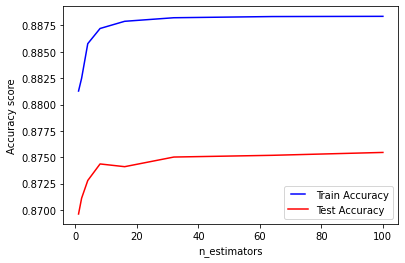

In [233]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
train = []
test = []

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    rf.fit(x_train, y_train)
    train.append(accuracy_score(y_train, rf.predict(x_train)))
    test.append(accuracy_score(y_test, rf.predict(x_test)))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train, "b", label="Train Accuracy")
line2, = plt.plot(n_estimators, test, "r", label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("n_estimators")
plt.show()

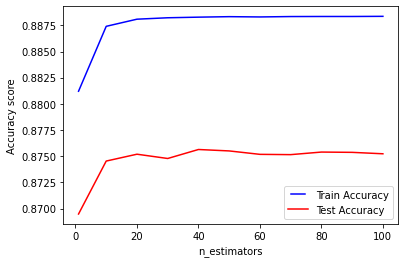

In [237]:
n_estimators = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train = []
test = []

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    rf.fit(x_train, y_train)
    train.append(rf.score(x_train,y_train))
    test.append(rf.score(x_test,y_test))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train, "b", label="Train Accuracy")
line2, = plt.plot(n_estimators, test, "r", label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("n_estimators")
plt.show()

Testing with different n_estimators, found that for n_estimators=36 have the least overfitting, so I used n_estimators=36 to build a new model

[]

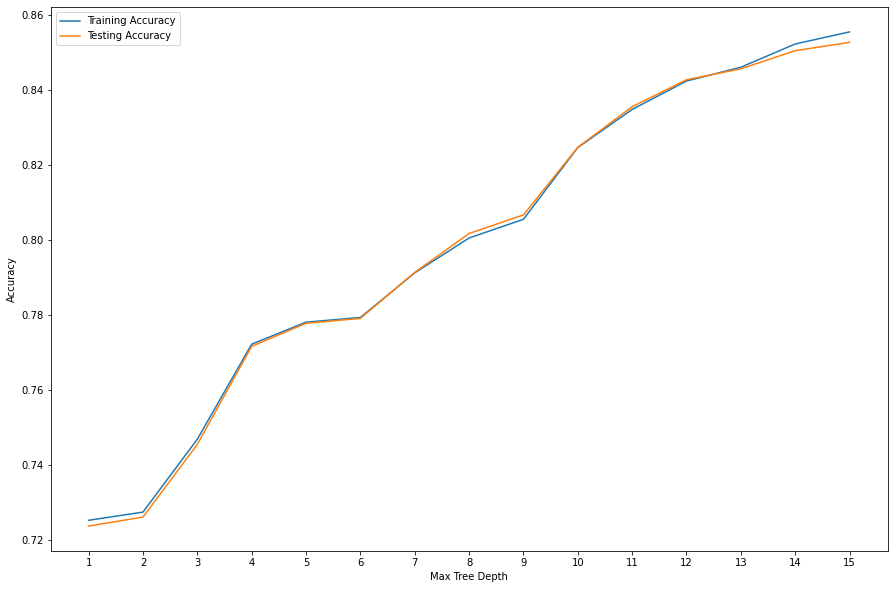

In [242]:
max_depth_list = np.linspace(1, 15, num=15)

train_accuracy = []
test_accuracy = []

for i in max_depth_list:
    rfc = RandomForestClassifier(max_depth=int(i)) 
    rfc.fit(x_train,y_train)
    train_accuracy.append(rfc.score(x_train, y_train))
    test_accuracy.append(rfc.score(x_test, y_test))

x = np.arange(len(max_depth_list)) + 1
plt.figure(figsize=(15,10))
plt.xticks(x)
plt.plot(x, train_accuracy, label='Training Accuracy')
plt.plot(x, test_accuracy, label='Testing Accuracy')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

## Matrix Evaluation

Comparing two model matrics

Text(0.5, 1.0, 'Confusion matrix for test set')

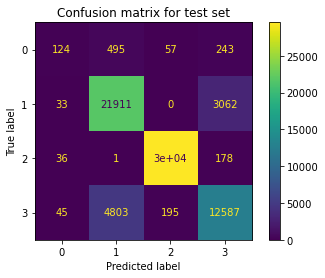

In [243]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_test_pred = rf.predict(x_test)
test_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(test_matrix).plot()
plt.title('Confusion matrix for test set')

In [245]:
from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score, accuracy_score

print('Test accuracy: ', accuracy_score(y_test, rf.predict(x_test)))
print('Test overall recall: ', recall_score(y_test, rf.predict(x_test), average='macro'))

Test accuracy:  0.8752318603382433
Test overall recall:  0.6794723038518696


Text(0.5, 1.0, 'Confusion matrix for test set')

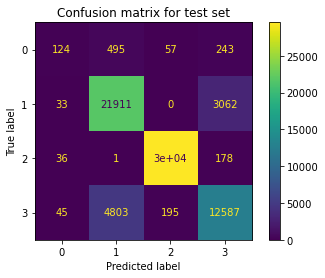

In [246]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = model.predict(x_test)
test_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(test_matrix).plot()
plt.title('Confusion matrix for test set')

We could see that after n_estimators has changed, the FN score is decresed, and the recall has increased. Therefore, the test accuracy is also increased.

In [247]:
print('Test accuracy: ', accuracy_score(y_test, rf.predict(x_test)))
print('Test overall recall: ', recall_score(y_test, rf.predict(x_test), average='macro'))

Test accuracy:  0.8752318603382433
Test overall recall:  0.6794723038518696


Text(0.5, 1.0, 'Confusion matrix for train set')

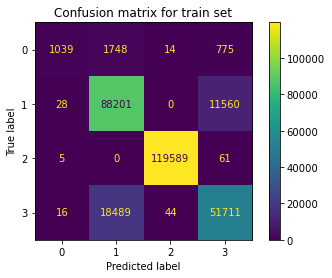

In [244]:
y_train_pred = rf.predict(x_train)
train_matrix = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(train_matrix).plot()
plt.title('Confusion matrix for train set')

In [202]:
print('Train accuracy: ', accuracy_score(y_train, model.predict(x_train)))
print('Train overall recall: ', recall_score(y_train, model.predict(x_train), average='macro'))

Train accuracy:  1.0
Train overall recall:  1.0


In [199]:
import pickle
filename = 'RandomForestModel'
pickle.dump(rf2, open(filename,'wb'))

In [200]:
model = pickle.load(open(filename,'rb'))